# Mass Track & Isochrone Comparisons

Comparing standard and magnetic isochrones at 10 Myr.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Load each of the isochrones.

In [2]:
std = np.genfromtxt('/Users/grefe950/evolve/dmestar/iso/gs98/p000/a0/amlt1884/dmestar_00010.0myr_z+0.00_a+0.00_phx.iso')
mag = np.genfromtxt('/Users/grefe950/evolve/data/beq/models/GS98/dmestar_00010.0myr_z+0.00_a+0.00_phx_magBeq.iso')

Load a few mass tracks of each variety. First, standard (i.e., non-magnetic) mass tracks.

In [18]:
std_m0900 = np.genfromtxt('/Users/grefe950/evolve/dmestar/trk/gs98/p000/a0/amlt1884/m0900_GS98_p000_p0_y28_mlt1.884.trk',
                          usecols=(0, 1, 2, 3, 4))
std_m1200 = np.genfromtxt('/Users/grefe950/evolve/dmestar/trk/gs98/p000/a0/amlt1884/m1200_GS98_p000_p0_y28_mlt1.884.trk',
                          usecols=(0, 1, 2, 3, 4))
std_m1500 = np.genfromtxt('/Users/grefe950/evolve/dmestar/trk/gs98/p000/a0/amlt1884/m1500_GS98_p000_p0_y28_mlt1.884.trk',
                          usecols=(0, 1, 2, 3, 4))
std_m1700 = np.genfromtxt('/Users/grefe950/evolve/dmestar/trk/gs98/p000/a0/amlt1884/m1700_GS98_p000_p0_y28_mlt1.884.trk',
                          usecols=(0, 1, 2, 3, 4))

In [19]:
mag_m0900 = np.genfromtxt('/Users/grefe950/evolve/data/beq/models/GS98/m0900_GS98_p000_p0_y28_mlt1.884_mag23kG.trk',
                          usecols=(0, 1, 2, 3, 4))
mag_m1200 = np.genfromtxt('/Users/grefe950/evolve/data/beq/models/GS98/m1200_GS98_p000_p0_y28_mlt1.884_mag18kG.trk',
                          usecols=(0, 1, 2, 3, 4))
mag_m1500 = np.genfromtxt('/Users/grefe950/evolve/data/beq/models/GS98/m1500_GS98_p000_p0_y28_mlt1.884_mag13kG.trk',
                          usecols=(0, 1, 2, 3, 4))
mag_m1700 = np.genfromtxt('/Users/grefe950/evolve/data/beq/models/GS98/m1700_GS98_p000_p0_y28_mlt1.884_mag08kG.trk',
                          usecols=(0, 1, 2, 3, 4))

Now we need to place each onto a fixed grid so that we can analyze the relative change of the magnetic track to the standard track.

In [5]:
from scipy.interpolate import interp1d
log10_ages = np.arange(6.0, 8.01, 0.01)

In [6]:
def setEqualAgeGrid(iso):
    icurve = interp1d(iso[:,0], iso, axis=0, kind='linear')
    return icurve(10**np.arange(6.0, 8.01, 0.01))

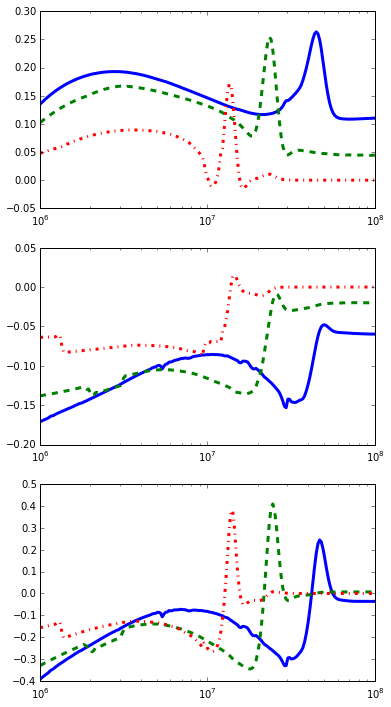

In [23]:
# Compare relative radii as a function of age
fig, ax = plt.subplots(3, 1, figsize=(6.0, 12.0))

ages = 10**log10_ages

std_trk = setEqualAgeGrid(std_m0900)
mag_trk = setEqualAgeGrid(mag_m0900)
ax[0].semilogx(ages, 10**mag_trk[:,4]/10**std_trk[:,4] - 1.0, '-',  lw=3)
ax[1].semilogx(ages, 10**mag_trk[:,1]/10**std_trk[:,1] - 1.0, '-',  lw=3)
ax[2].semilogx(ages, 10**mag_trk[:,3]/10**std_trk[:,3] - 1.0, '-',  lw=3)

std_trk = setEqualAgeGrid(std_m1200)
mag_trk = setEqualAgeGrid(mag_m1200)
ax[0].semilogx(ages, 10**mag_trk[:,4]/10**std_trk[:,4] - 1.0, '--', lw=3)
ax[1].semilogx(ages, 10**mag_trk[:,1]/10**std_trk[:,1] - 1.0, '--',  lw=3)
ax[2].semilogx(ages, 10**mag_trk[:,3]/10**std_trk[:,3] - 1.0, '--',  lw=3)

std_trk = setEqualAgeGrid(std_m1500)
mag_trk = setEqualAgeGrid(mag_m1500)
ax[0].semilogx(ages, 10**mag_trk[:,4]/10**std_trk[:,4] - 1.0, '-.', lw=3)
ax[1].semilogx(ages, 10**mag_trk[:,1]/10**std_trk[:,1] - 1.0, '-.',  lw=3)
ax[2].semilogx(ages, 10**mag_trk[:,3]/10**std_trk[:,3] - 1.0, '-.',  lw=3)

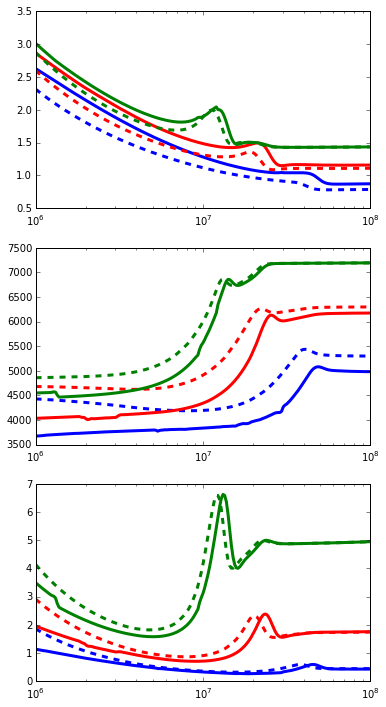

In [26]:
# Compare evolution
fig, ax = plt.subplots(3, 1, figsize=(6.0, 12.0))

ages = 10**log10_ages

std_trk = setEqualAgeGrid(std_m0900)
mag_trk = setEqualAgeGrid(mag_m0900)
ax[0].semilogx(ages, 10**mag_trk[:,4], '-',  lw=3, c='b')
ax[0].semilogx(ages, 10**std_trk[:,4], '--', lw=3, c='b')
ax[1].semilogx(ages, 10**mag_trk[:,1], '-',  lw=3, c='b')
ax[1].semilogx(ages, 10**std_trk[:,1], '--', lw=3, c='b')
ax[2].semilogx(ages, 10**mag_trk[:,3], '-',  lw=3, c='b')
ax[2].semilogx(ages, 10**std_trk[:,3], '--', lw=3, c='b')

std_trk = setEqualAgeGrid(std_m1200)
mag_trk = setEqualAgeGrid(mag_m1200)
ax[0].semilogx(ages, 10**mag_trk[:,4], '-',  lw=3, c='r')
ax[0].semilogx(ages, 10**std_trk[:,4], '--', lw=3, c='r')
ax[1].semilogx(ages, 10**mag_trk[:,1], '-',  lw=3, c='r')
ax[1].semilogx(ages, 10**std_trk[:,1], '--', lw=3, c='r')
ax[2].semilogx(ages, 10**mag_trk[:,3], '-',  lw=3, c='r')
ax[2].semilogx(ages, 10**std_trk[:,3], '--', lw=3, c='r')

std_trk = setEqualAgeGrid(std_m1500)
mag_trk = setEqualAgeGrid(mag_m1500)
ax[0].semilogx(ages, 10**mag_trk[:,4], '-',  lw=3, c='g')
ax[0].semilogx(ages, 10**std_trk[:,4], '--', lw=3, c='g')
ax[1].semilogx(ages, 10**mag_trk[:,1], '-',  lw=3, c='g')
ax[1].semilogx(ages, 10**std_trk[:,1], '--', lw=3, c='g')
ax[2].semilogx(ages, 10**mag_trk[:,3], '-',  lw=3, c='g')
ax[2].semilogx(ages, 10**std_trk[:,3], '--', lw=3, c='g')